<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/ITBD/notebooks/15heart_disease_pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Import Data

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 40 kB/s 
     |████████████████████████████████| 198 kB 63.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=b093073220b86542e629e6c76ee60e08f27558fd344f5210b7be9f7f6ff8f725
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

In [ ]:
#Load data into spark 
#data = spark.read.csv('/kaggle/input/heart-disease-uci/heart.csv', header = True)

#data = spark.read.csv('https://archive.ics.uci.edu/ml/datasets/Heart+Disease/heart.csv', header = True)

data = spark.read.csv('heart.csv', header = True)

In [ ]:
df = pd.read_csv('heart.csv')

#df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 2. Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#Columns in data
data.printSchema()

root
 |-- age: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- cp: string (nullable = true)
 |-- trestbps: string (nullable = true)
 |-- chol: string (nullable = true)
 |-- fbs: string (nullable = true)
 |-- restecg: string (nullable = true)
 |-- thalach: string (nullable = true)
 |-- exang: string (nullable = true)
 |-- oldpeak: string (nullable = true)
 |-- slope: string (nullable = true)
 |-- ca: string (nullable = true)
 |-- thal: string (nullable = true)
 |-- target: string (nullable = true)



In [ ]:
from pyspark.sql.types import *

# Write a custom function to convert the data type of DataFrame columns
def convertColumn(df, names, newType):
  for name in names: 
     df = df.withColumn(name, df[name].cast(newType))
  return df 
int_columns = ['age','sex','cp', 'trestbps','chol','fbs','restecg','thalach','exang','slope','ca','thal','target']
float_column = ['oldpeak']
data = convertColumn(data, int_columns, IntegerType())
data = convertColumn(data, float_column, FloatType())

In [ ]:
data.persist()

DataFrame[age: int, sex: int, cp: int, trestbps: int, chol: int, fbs: int, restecg: int, thalach: int, exang: int, oldpeak: float, slope: int, ca: int, thal: int, target: int]

In [ ]:
print(type(data))

<class 'pyspark.sql.dataframe.DataFrame'>


Esto es interesante y nos indica cómo se utiliza el tipo de Spark, estilo .head

In [ ]:
#Take one sample
data.take(1)

[Row(age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.299999952316284, slope=0, ca=0, thal=1, target=1)]

Aunque como es dataframe de tipo spark también podemos utilizar head

In [ ]:
data.head(3)

[Row(age=63, sex=1, cp=3, trestbps=145, chol=233, fbs=1, restecg=0, thalach=150, exang=0, oldpeak=2.299999952316284, slope=0, ca=0, thal=1, target=1),
 Row(age=37, sex=1, cp=2, trestbps=130, chol=250, fbs=0, restecg=1, thalach=187, exang=0, oldpeak=3.5, slope=0, ca=0, thal=2, target=1),
 Row(age=41, sex=0, cp=1, trestbps=130, chol=204, fbs=0, restecg=0, thalach=172, exang=0, oldpeak=1.399999976158142, slope=2, ca=0, thal=2, target=1)]

In [ ]:
data.describe().show() # It is hard to see

+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|summary|               age|                sex|                cp|          trestbps|              chol|                fbs|          restecg|           thalach|              exang|           oldpeak|             slope|                ca|              thal|            target|
+-------+------------------+-------------------+------------------+------------------+------------------+-------------------+-----------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+
|  count|               303|                303|               303|               303|               303|                303|              303|               303|    

In [ ]:
data.describe('target').show()

+-------+------------------+
|summary|            target|
+-------+------------------+
|  count|               303|
|   mean|0.5445544554455446|
| stddev|0.4988347841643915|
|    min|                 0|
|    max|                 1|
+-------+------------------+



In [ ]:
data.describe('age').show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|               303|
|   mean|54.366336633663366|
| stddev|  9.08210098983786|
|    min|                29|
|    max|                77|
+-------+------------------+



In [ ]:
#Count number of samples, la dimensión, como el shape
data.count()

303

In [ ]:
#Change spark to pandas dataframe
pd_data =data.toPandas()
pd_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int32  
 1   sex       303 non-null    int32  
 2   cp        303 non-null    int32  
 3   trestbps  303 non-null    int32  
 4   chol      303 non-null    int32  
 5   fbs       303 non-null    int32  
 6   restecg   303 non-null    int32  
 7   thalach   303 non-null    int32  
 8   exang     303 non-null    int32  
 9   oldpeak   303 non-null    float32
 10  slope     303 non-null    int32  
 11  ca        303 non-null    int32  
 12  thal      303 non-null    int32  
 13  target    303 non-null    int32  
dtypes: float32(1), int32(13)
memory usage: 16.7 KB


In [ ]:
#One-hot encoding maps a categorical feature, represented as a label index, to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values.
# es interesante su uso, y práctico para los algoritmos machine learning, está algo más alejado de las intenciones del curso...

from pyspark.ml.feature import OneHotEncoder
encoder = OneHotEncoder(inputCols=['sex','cp','fbs','restecg','exang','slope','ca','thal'],
                           outputCols =['sexVec','cpVec','fbsVec','restecgVec','exangVec','slopeVec','caVec','thalVec'])
encoded =  encoder.fit(data).transform(data)
data_encoded = encoded.drop('sex','cp','fbs','restecg','exang','slope','ca','thal')
data_encoded.show()

+---+--------+----+-------+-------+------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|age|trestbps|chol|thalach|oldpeak|target|       sexVec|        cpVec|       fbsVec|   restecgVec|     exangVec|     slopeVec|        caVec|      thalVec|
+---+--------+----+-------+-------+------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
| 63|     145| 233|    150|    2.3|     1|    (1,[],[])|    (3,[],[])|    (1,[],[])|(2,[0],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(4,[0],[1.0])|(3,[1],[1.0])|
| 37|     130| 250|    187|    3.5|     1|    (1,[],[])|(3,[2],[1.0])|(1,[0],[1.0])|(2,[1],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(4,[0],[1.0])|(3,[2],[1.0])|
| 41|     130| 204|    172|    1.4|     1|(1,[0],[1.0])|(3,[1],[1.0])|(1,[0],[1.0])|(2,[0],[1.0])|(1,[0],[1.0])|    (2,[],[])|(4,[0],[1.0])|(3,[2],[1.0])|
| 56|     120| 236|    178|    0.8|     1|    (1,[],[])|(3,[1],[1.0])|

# 3. PCA

In [ ]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols =['age','trestbps','chol','thalach','oldpeak','sexVec','cpVec','fbsVec','restecgVec','exangVec','slopeVec','caVec','thalVec'],
                           outputCol="features")
assembled= assembler.transform(data_encoded)

data_asb =assembled.select("features","target")
data_asb.show()


+--------------------+------+
|            features|target|
+--------------------+------+
|(22,[0,1,2,3,4,10...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,7,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,7,9,...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,8,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,7,...|     1|
|(22,[0,1,2,3,4,9,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,5,8,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
|(22,[0,1,2,3,4,6,...|     1|
|(22,[0,1,2,3,4,5,...|     1|
+--------------------+------+
only showing top 20 rows



In [ ]:
from pyspark.ml.feature import PCA

pca = PCA(k=13, inputCol="features", outputCol="pcaFeatures")
model = pca.fit(data_asb).transform(data_asb)

data_pca = model.select("pcaFeatures","target")
data_pca.head()

Row(pcaFeatures=DenseVector([-240.8323, 124.5393, 157.8559, 57.8458, -3.0528, 0.4427, -0.4674, 1.0292, 1.0155, -0.7207, -0.2413, -1.1992, 1.0616]), target=1)

Igualmente esta parte queda algo fuera de esta asignatura pero con el pyspark se podrá utilizar más adelante

# 4. Modelos para la predicción - Machine learning

Referencias en la guía de Spark

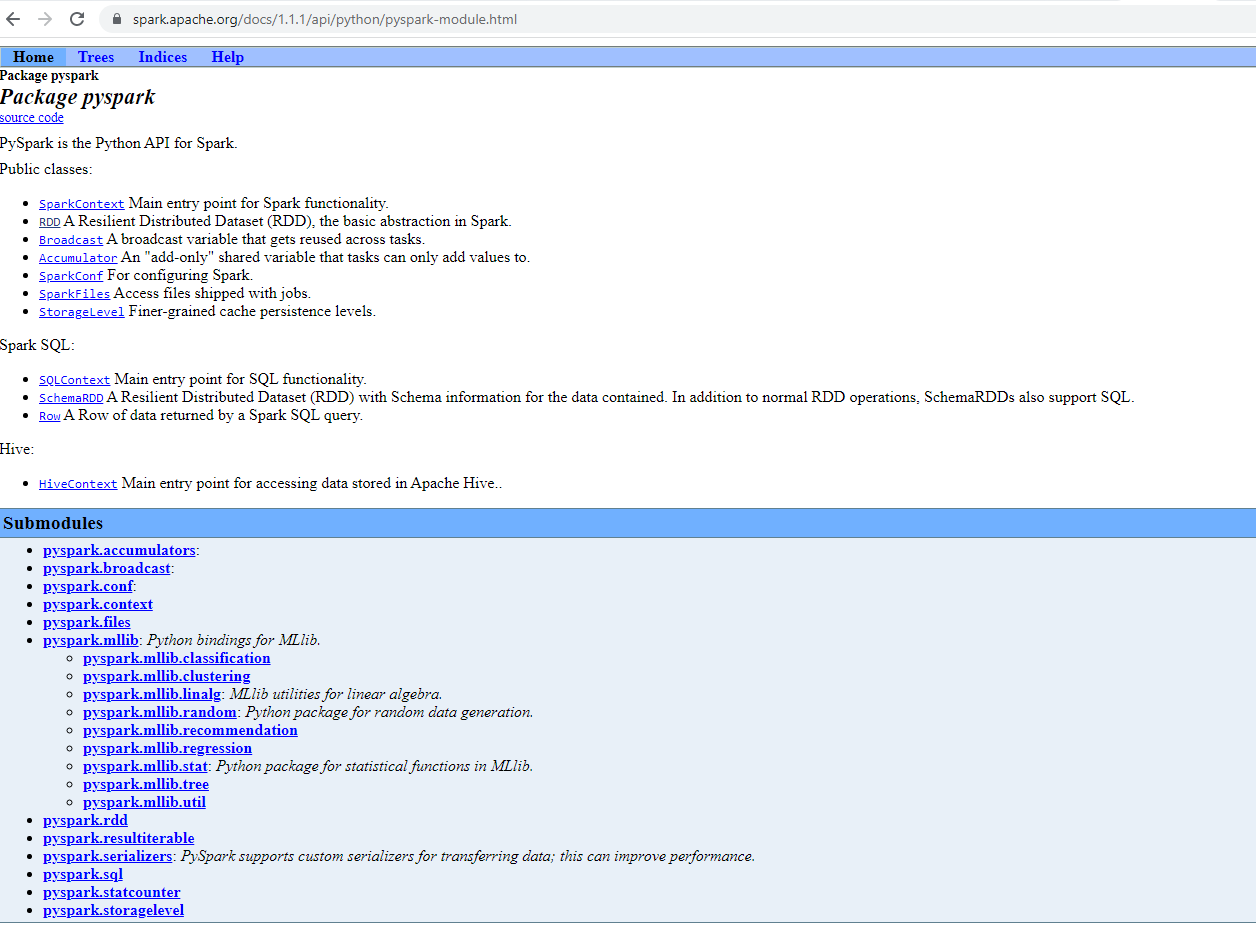

In [ ]:
train_data, test_data = data_pca.randomSplit([.7,.3],seed=1234)

# Logistic Regression 

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize
lr = LogisticRegression(labelCol="target", featuresCol="pcaFeatures", maxIter=10, regParam=0.3, elasticNetParam=0.8,family="binomial")
# Fit the data to the model
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
lr_accuracy = evaluator.evaluate(lr_predictions)
print('Test Accuracy = ', lr_accuracy)

Test Accuracy =  0.5454545454545454


# Decision Tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
# Initialize
dt = DecisionTreeClassifier(labelCol="target", featuresCol="pcaFeatures")
# Fit the data to the model
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
dt_accuracy = evaluator.evaluate(dt_predictions)
print('Test Accuracy = ', dt_accuracy)

Test Accuracy =  0.8181818181818182


# Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
# Initialize
rf = RandomForestClassifier(labelCol="target", featuresCol="pcaFeatures")
# Fit the data to the model
rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
rf_accuracy = evaluator.evaluate(rf_predictions)
print('Test Accuracy = ', rf_accuracy)

Test Accuracy =  0.8181818181818182


# Gradient-boosted tree classifier

In [ ]:
from pyspark.ml.classification import GBTClassifier
# Initialize
gbt = GBTClassifier(labelCol="target", featuresCol="pcaFeatures")
# Fit the data to the model
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
gbt_accuracy = evaluator.evaluate(gbt_predictions)
print('Test Accuracy = ', gbt_accuracy)

Test Accuracy =  0.797979797979798


# Multilayer perceptron classifier

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
# Initialize
mpc = MultilayerPerceptronClassifier(labelCol="target", featuresCol="pcaFeatures", seed=1234, layers=[13,5,4,2])
# Fit the data to the model
mpc_model = mpc.fit(train_data)
mpc_predictions = mpc_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
mpc_accuracy = evaluator.evaluate(mpc_predictions)
print('Test Accuracy = ', mpc_accuracy)

Test Accuracy =  0.5454545454545454


# Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes
# Initialize
nb = NaiveBayes(labelCol="target", featuresCol="pcaFeatures",smoothing=1.0, modelType="gaussian")
# Fit the data to the model
nb_model = nb.fit(train_data)
nb_predictions = nb_model.transform(test_data)
# Calculate accuracy
evaluator = MulticlassClassificationEvaluator(labelCol='target',predictionCol='prediction', metricName='accuracy')
nb_accuracy = evaluator.evaluate(nb_predictions)
print('Test Accuracy = ', nb_accuracy)

Test Accuracy =  0.8484848484848485
